<a href="https://colab.research.google.com/github/NeznaikanaLune/MISIS_DS_Masters_degree_2020/blob/master/stats2_confidence_interval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задача №1

Управляющий супермаркета хочет оценить, сколько денег покупатели тратят за один поход в супермаркет в среднем. На основании ранее собранных данных известно, что расходы одного покупателя распределены приблизительно нормально. Управляющий взял случайную выборку из $15$ покупателей и выяснил, что их средние расходы равны 2000  рублей, а выборочное стандартное отклонение равно 400 рублей.
Давайте поможем управляющему, решив несколько задачек с помощью Python.
Для решения этих задач мы будем использовать модуль stats библиотеки scipy.

1. Посчитать 95 %-ный доверительный интервал для истинного среднего значения расходов одного покупателя. 

In [34]:
from scipy.stats import t
from scipy.stats import norm
import math

def confidence_interval_t(alpha, s, n, mean):
    value = t.ppf(alpha / 2, n - 1) * s / math.sqrt(n)
    return mean + value, mean - value

for l in [0.10,0.05,0.01]:
  print('ДИ для уровня значимости',l*100,'%:',confidence_interval_t(l, 400, 15, 2000))

ДИ для уровня значимости 10.0 %: (1818.092671377004, 2181.907328622996)
ДИ для уровня значимости 5.0 %: (1778.4873833741433, 2221.5126166258565)
ДИ для уровня значимости 1.0 %: (1692.553004440083, 2307.446995559917)


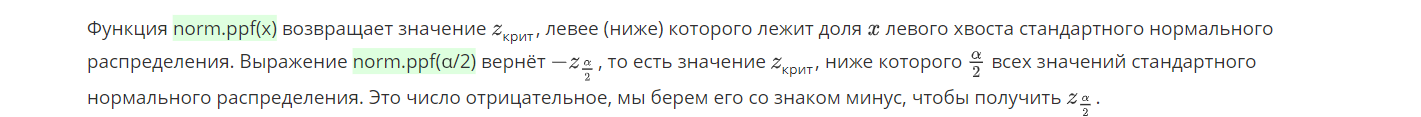

In [66]:
norm.ppf(0.025)

-1.9599639845400545

# Задача 2
Чиновника интересует сумма подоходного налога, выплачиваемого домохозяйствами за год. На случайной выборке из 250 домохозяйств был посчитан средний размер выплаченного налога, и он составил \$3540. Также на основании ранее предоставленных данных из налоговой инспекции известно истинное стандартное отклонение величины подоходного налога, равное $1150.
Необходимо найти 99% доверительный интервал для истинного среднего значения налоговых выплат за год.

Найдите 99%-ный доверительный интервал для среднего значения годовых отчислений на подоходный налог 

In [18]:
from scipy.stats import norm
import math

def confidence_interval_norm(alpha, sigma, n, mean):
    value = -norm.ppf(alpha / 2) * sigma / math.sqrt(n)
    return mean - value, mean + value

confidence_interval_norm(0.01, 1150, 250, 3540)

(3352.6537883505453, 3727.3462116494547)

# Задача 3

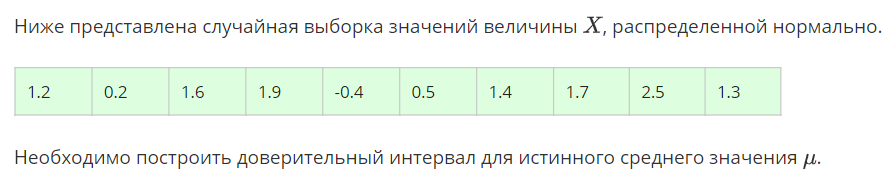

Можем воспользоваться Т распределением несмотря на небольшую выборку для оценки ДИ, тк выборка случайная и сама исходная велечина X распределена нормально. 

In [35]:
import numpy as np

X = np.array([1.2,0.2,1.6,1.9,-0.4,0.5,1.4,1.7,2.5,1.3])
m = X.mean()
s =  X.std(ddof=1)
print('ДИ для уровня значимости',5,'%:',confidence_interval_t(0.05, s, X.shape[0], m))

ДИ для уровня значимости 5 %: (0.5732883999380967, 1.8067116000619032)


# Задача 4

Чтобы оценить удовлетворенность клиентов сети отелей, менеджер взял случайную выборку из 189 комментариев, оставленных посетителями на онлайн-платформе по бронированию, и провел анализ их содержания. Выяснилось, что 132 комментария были положительными, остальные — негативными.

1. Чему равна выборочная пропорция положительных комментариев? Укажите с точностью до трех знаков после разделительной точки.

2. Найдите 90 %-ный доверительный интервал для истинной пропорции положительных комментариев. 

In [63]:
def confidence_interval_t(alpha, s, n, p):
    value = t.ppf(alpha / 2, n - 1) * s
    return p + value, p - value

p_pos = 132/189
p_pos_std = np.sqrt((p_pos*(1-p_pos)/189))
print(p_pos,p_pos_std)
print('1. Выборочная пропорция положительных комментариев:',round(p_pos,3))
print('2. ДИ для уровня значимости',10,'%:',confidence_interval_t(0.1, p_pos_std, 189, p_pos))

0.6984126984126984 0.033383486167905034
1. Выборочная пропорция положительных комментариев: 0.698
2. ДИ для уровня значимости 10 %: (0.6432298254026277, 0.753595571422769)


# Задача 5

Найдите z-критическое для интервала с уровнем доверия 93 %. Укажите с точностью до 2 знаков после разделительной точки.

In [68]:
-1*norm.ppf(0.035)

1.8119106729525978

Найдите критические значения для доверительного интервала для среднего  нормально распределённой величины , на выборке размером 10, если $σ$ известна, на 99 % уровне доверия

In [70]:
-1*norm.ppf(0.005)

2.575829303548901

Найдите критические значения для доверительного интервала для среднего  нормально распределённой величины , на выборке размером 10 , если $σ$ **неизвестна**, на 99% уровне доверия

In [71]:
-1*t.ppf(0.005,9)

3.24983554401537

Найдите критические значения для доверительного интервала для среднего , на выборке размером 100,если $σ$ **неизвестна**, на 95% уровне доверия

In [74]:
-1*t.ppf(0.025,99)

1.9842169515086832

Доверительный интервал для пропорции p, на выборке размером 100, на 95% уровне доверия

In [75]:
-1*norm.ppf(0.025)

1.9599639845400545